<table style="width:100%;">
  <tr>
    <td style="text-align:left; width:33%;">
      <img src="./logo/univ.png" alt="Logo gauche" width="200">
    </td>
    <td style="text-align:center; width:33%;">
      <img src="./logo/but-sd.png" alt="Logo centre" width="200">
    </td>
    <td style="text-align:right; width:33%;">
      <img src="./logo/iut-villetaneuse.png" alt="Logo droite" width="320">
    </td>
  </tr>
</table>

---

📘 Projet : SAÉ 2.03 – Régression sur données réelles

- **Nom :** BENKHERFELLAH  
- **Prénom :** Ibrahim  
- **Groupe :** Praxis 2 <br></br>
- **Département** : Science des Données
- **Établissement :** Université Sorbonne Paris Nord – IUT de Villeuniversité

**Date** : Mai 2025

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# Pallette de couleurs :
vert = "#5FC2BA"
bleu = "#3B556D"
jaune = "#FEEAA1"

In [3]:
# DataFrame --> Importation des donneés depuis le CSV
df = pd.read_csv("../data/data.csv")

In [4]:
# Point Info
print(
    f"Le fichier data comporte {df.shape[0]} lignes\nAinsi que {df.shape[1]} colonnes"
)

Le fichier data comporte 569 lignes
Ainsi que 32 colonnes


# Voici un petit descriptif des différentes colonnes

## Colonnes du fichier

| Colonne                        | Traduction en français                 | Description                                                                 |
|-------------------------------|----------------------------------------|-----------------------------------------------------------------------------|
| `id`                          | Identifiant                            | Numéro unique d'identification du patient.                                 |
| `diagnosis`                   | Diagnostic                             | Résultat du diagnostic : M = Malin (cancer), B = Bénin (non cancéreux).    |

## Caractéristiques morphologiques des tumeurs

### Moyennes (`*_mean`)

| Colonne                        | Traduction en français                   | Description                                                                 |
|-------------------------------|------------------------------------------|-----------------------------------------------------------------------------|
| `radius_mean`                 | Rayon moyen                              | Distance moyenne du centre vers le bord de la tumeur.                      |
| `texture_mean`               | Texture moyenne                          | Variation des niveaux de gris (granularité de l’image).                    |
| `perimeter_mean`             | Périmètre moyen                          | Périmètre moyen de la tumeur.                                              |
| `area_mean`                  | Surface moyenne                          | Surface occupée par la tumeur.                                             |
| `smoothness_mean`           | Lissage moyen                            | Régularité des contours.                                                  |
| `compactness_mean`          | Compacité moyenne                        | Mesure de la compacité des contours.                                       |
| `concavity_mean`            | Concavité moyenne                        | Gravité des zones concaves dans les contours de la tumeur.                |
| `concave points_mean`       | Points concaves moyens                  | Nombre moyen de points concaves.                                           |
| `symmetry_mean`             | Symétrie moyenne                         | Mesure de la symétrie de la tumeur.                                        |
| `fractal_dimension_mean`    | Dimension fractale moyenne               | Complexité du contour (valeurs proches de 1 indiquent une forme simple).   |

### Écart-type (`*_se`)

| Colonne                        | Traduction en français                   | Description                                                                 |
|-------------------------------|------------------------------------------|-----------------------------------------------------------------------------|
| `radius_se`                   | Écart-type du rayon                      | Variation du rayon.                                                         |
| `texture_se`                 | Écart-type de la texture                 | Variation de la texture.                                                    |
| `perimeter_se`               | Écart-type du périmètre                  | Variation du périmètre.                                                     |
| `area_se`                    | Écart-type de la surface                 | Variation de la surface.                                                    |
| `smoothness_se`             | Écart-type du lissage                   | Variation du lissage.                                                       |
| `compactness_se`            | Écart-type de la compacité              | Variation de la compacité.                                                  |
| `concavity_se`              | Écart-type de la concavité              | Variation de la concavité.                                                  |
| `concave points_se`         | Écart-type des points concaves          | Variation du nombre de points concaves.                                     |
| `symmetry_se`               | Écart-type de la symétrie               | Variation de la symétrie.                                                   |
| `fractal_dimension_se`      | Écart-type de la dimension fractale     | Variation de la dimension fractale.                                         |

### Valeurs extrêmes (`*_worst`)

| Colonne                        | Traduction en français                   | Description                                                                 |
|-------------------------------|------------------------------------------|-----------------------------------------------------------------------------|
| `radius_worst`               | Rayon maximal                            | Valeur maximale du rayon.                                                   |
| `texture_worst`             | Texture maximale                         | Valeur maximale de la texture.                                              |
| `perimeter_worst`           | Périmètre maximal                        | Valeur maximale du périmètre.                                               |
| `area_worst`                | Surface maximale                         | Surface maximale occupée.                                                   |
| `smoothness_worst`         | Lissage maximal                          | Lissage maximal observé.                                                    |
| `compactness_worst`        | Compacité maximale                       | Valeur maximale de la compacité.                                            |
| `concavity_worst`          | Concavité maximale                       | Valeur maximale de la concavité.                                            |
| `concave points_worst`     | Points concaves maximaux                 | Nombre maximal de points concaves.                                          |
| `symmetry_worst`           | Symétrie maximale                        | Symétrie maximale observée.                                                 |
| `fractal_dimension_worst`  | Dimension fractale maximale              | Complexité maximale du contour.                                             |


---

# Quelque petit tests

Commencons par faire quelque calculs de moyenne afin d'essayer de voir comment sont répartis les données :

In [5]:
area_moy = round(float(df["area_mean"].mean()), 3)
print(f"L'étandue moyenne des tumeurs est de {area_moy}")

L'étandue moyenne des tumeurs est de 654.889


In [6]:
peri_worst_moy = round(float(df["perimeter_worst"].mean()), 3)
print(f"La moyenne des pires moyenne de périmètre de tumeur est de {peri_worst_moy}")

La moyenne des pires moyenne de périmètre de tumeur est de 107.261


In [7]:
smoothness_moy = round(float(df["smoothness_mean"].mean()), 3)
print(f"La moyenne des pires moyenne de périmètre de tumeur est de {smoothness_moy}")

La moyenne des pires moyenne de périmètre de tumeur est de 0.096


---

# Travail Exploratoire

## Question 1 : Représenter graphiquement la proportion de tumeurs malignes et de tumeurs bénignes.

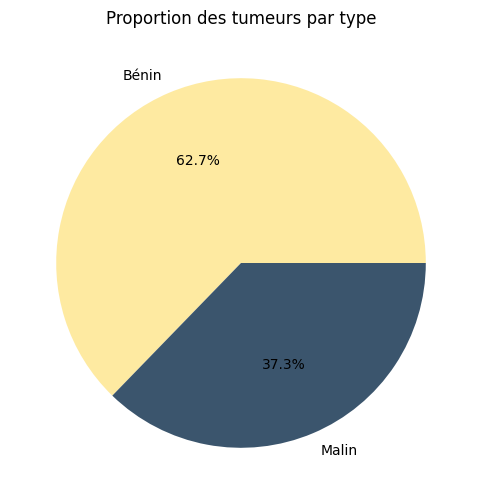

In [8]:
# On compte les valeurs du diagnostic
diagnosis_counts = df["diagnosis"].value_counts()

# Pie chart
part_tumeurs = diagnosis_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6, 6),
    labels=["Bénin", "Malin"],
    colors=[jaune, bleu],
    title="Proportion des tumeurs par type",
    ylabel="",
)

## Question 2 : Tracer puis analyser l'histogramme du rayon (radius_mean)

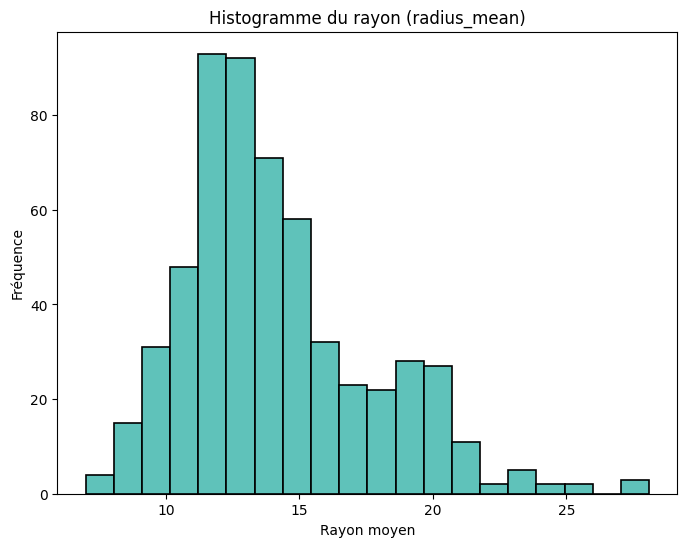

In [9]:
# On sélectionne la colonne `radius_mean`
radius_mean = df["radius_mean"]

# Création du Graphique
radius_mean_plot = radius_mean.plot(
    kind="hist",
    figsize=(8, 6),
    title="Histogramme du rayon (radius_mean)",
    xlabel="Rayon moyen",
    ylabel="Fréquence",
    bins=20,
    edgecolor="black",
    linewidth=1.2,
    color=vert,
)

## Question 3 : Tracer, sur le même graphique, l'histogramme du rayon (radius_mean) en utilisant deux couleurs différentes pour différencier les tumeurs malignes (M) et des bénignes (B).

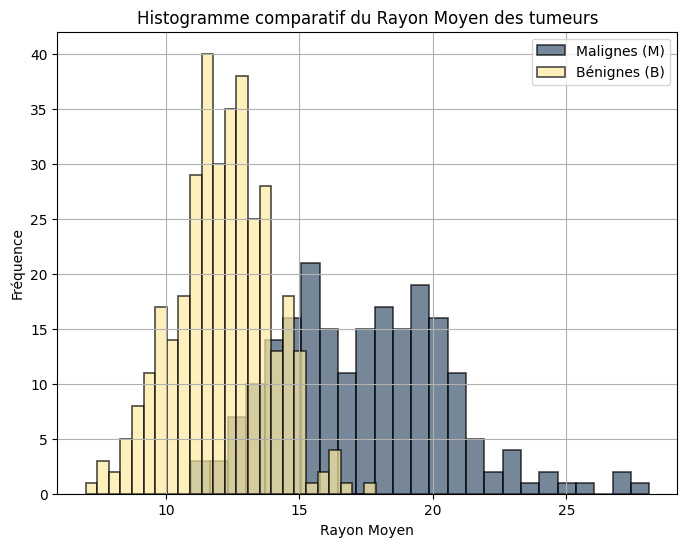

In [10]:
# Séparation des données selon le diagnostic
malignes = df[df["diagnosis"] == "M"]["radius_mean"]
benignes = df[df["diagnosis"] == "B"]["radius_mean"]

# Création du graphique
plt.figure(figsize=(8, 6))

# Histogramme des tumeurs malignes
plt.hist(
    malignes,
    bins=25,
    color=bleu,
    edgecolor="black",
    linewidth=1.2,
    alpha=0.7,
    label="Malignes (M)",
)

# Histogramme des tumeurs bénignes
plt.hist(
    benignes,
    bins=25,
    color=jaune,
    edgecolor="black",
    linewidth=1.2,
    alpha=0.7,
    label="Bénignes (B)",
)

# Titres et légendes
plt.title("Histogramme comparatif du Rayon Moyen des tumeurs")
plt.xlabel("Rayon Moyen")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

**Observation :** 

>_Je remarque que pour l'instant, dans les trois graphiques, les histogrammes des tumeurs Bénine (ceux en jaunes) ont tous l'air d'avoir l'allur d'une Gaussienne. À garder dans un coin de sa tête !_

## Question 4 : Effectuer la même opération que précédemment pour les dix variables statistiques, en positionnant les histogrammes sur deux colonnes et cinq lignes.

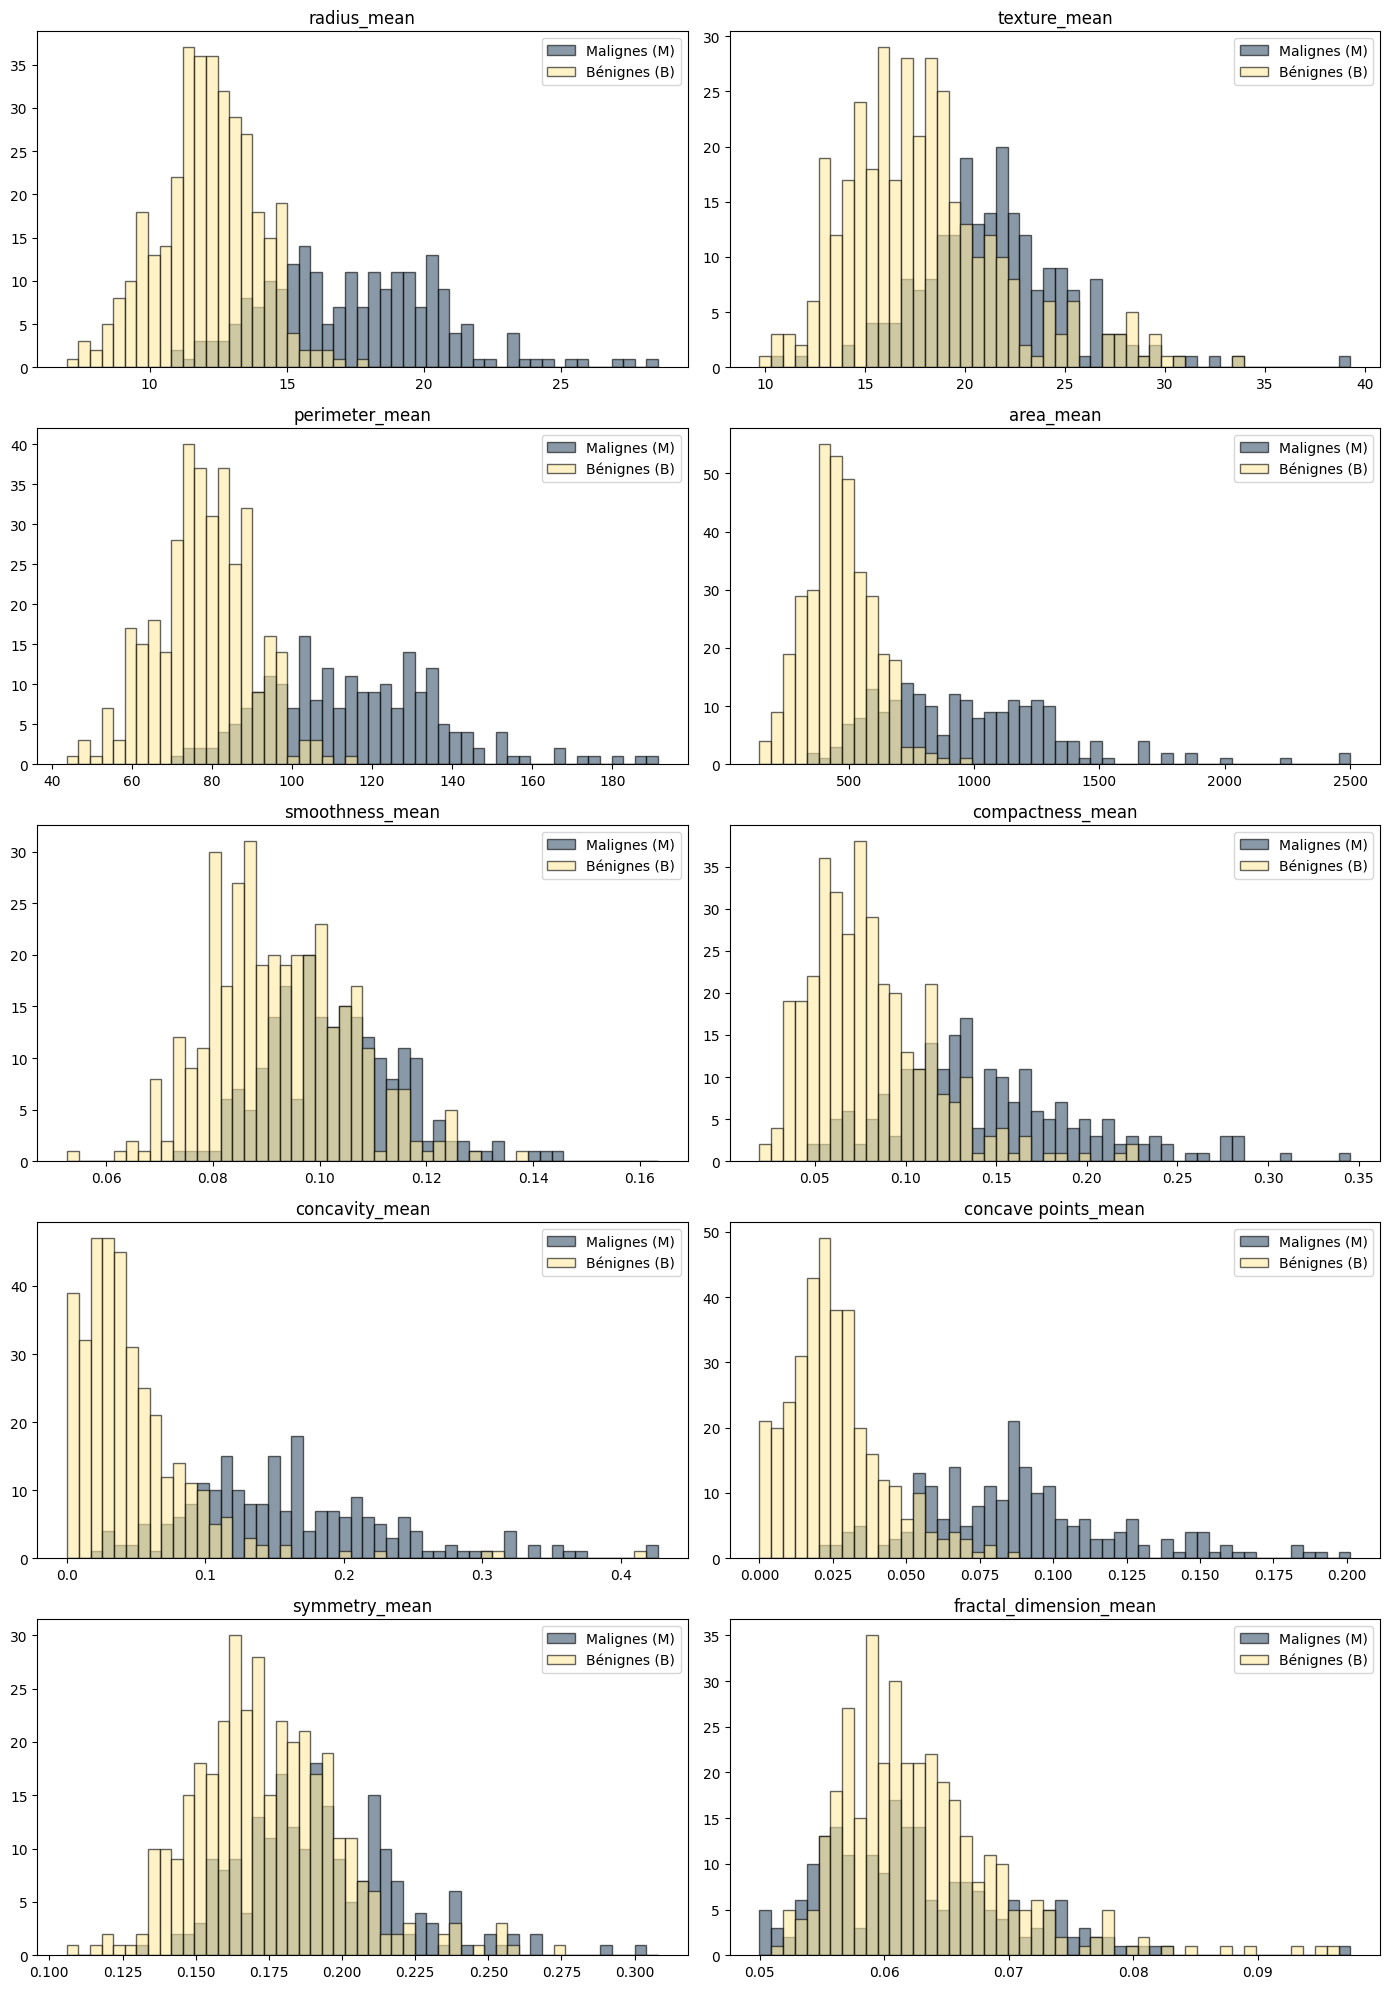

In [11]:
# Liste contenant seulement les varibles nécessaire
variable_stat = df.columns[2:12]

# Creéation du plan : 5 lignes x 2 colonnes
fig, axes = plt.subplots(5, 2, figsize=(14, 20))
axes = axes.flatten()

for i, var in enumerate(variable_stat):
    malignes = df[df["diagnosis"] == "M"][var]
    benignes = df[df["diagnosis"] == "B"][var]

    # Le bins est propre à chaque variable. Donc pour garantir un affichge 
    # de qualité ey homogène. On calcul le meilleur bins pour chaque varible
    
    # Calcul du min et max global pour les deux distributions
    vmin = min(malignes.min(), benignes.min())
    vmax = max(malignes.max(), benignes.max())

    # Définir un pas de classe
    step = (vmax - vmin) / 50
    bins = np.arange(vmin, vmax + step, step)

    # Tracer les deux histogrammes
    axes[i].hist(
        malignes,
        bins=bins,
        color=bleu,
        alpha=0.6,
        label="Malignes (M)",
        edgecolor="black",
    )
    axes[i].hist(
        benignes,
        bins=bins,
        color=jaune,
        alpha=0.6,
        label="Bénignes (B)",
        edgecolor="black",
    )

    axes[i].set_title(f"{var}")
    axes[i].legend()

plt.tight_layout()
plt.show()

## Question 5 : A partir de la figure précédente et d'une analyse argumentée, en déduire quelles variables pourraient, a priori, être discriminantes pour déterminer l'état de la tumeur.

<p style="text-align:justify;">Au départ, je pensais qu’il fallait avant tout vérifier si les variables suivaient une distribution gaussienne. J’ai donc commencé par tracer les histogrammes dans cette idée, mais en avançant, je me suis rendu compte que ce critère n’était pas vraiment essentiel pour ce qu’on cherchait à faire. Après quelques recherches en ligne, j’ai compris que l’objectif principal n’était pas de modéliser une distribution, mais plutôt de savoir si certaines variables permettaient de différencier les deux types de tumeurs (malignes et bénignes). Ce qui comptait, c’était donc surtout de voir si les deux catégories se confondaient ou non sur les graphiques. J’ai ensuite observé les histogrammes à la recherche de variables où les courbes des deux groupes étaient bien séparées. J’ai retenu celles où la forme et l’emplacement des distributions montraient une différence assez nette entre les deux diagnostics.

J’estime donc que les variables suivantes sont correctes pour distinguer l’état des tumeurs : 

> - radius_mean
> - perimeter_mean
> - area_mean
> - compactness_mean
> - concavity_mean
> - concave points_mean.

<p style="text-align:justify;">En observant les histogrammes, ces variables présentent un décalage assez clair entre les tumeurs bénignes et malignes. Les deux groupes ne se superposent pas trop, ce qui suggère qu’on peut s’en servir pour les différencier. Ce n’est pas forcément parce qu’elles suivent une forme particulière, mais plutôt parce qu’elles montrent visuellement une distinction entre les deux diagnostics, ce qui est utile pour un objectif de classification.

<p style="text-align:justify;">Toutes les autres sont donc à exclure car elles ne montrent pas de réelle séparation entre les tumeurs malignes et bénignes. Les distributions se recouvrent beaucoup, ce qui rend difficile la distinction entre les deux groupes.

## Question 6 : Tracer le nuage de points relatif à la texture en fonction du rayon, en utilisant deux couleurs différentes pour distinguer les tumeurs malignes (M) et bénignes (B). Analyser le nuage de point en termes de corrélation puis par rapport à l'objectif de classification des cas M ou B.

$$\text{Texture} = f(\text{rayon})$$

**Traduction** : on veut avoir en absisse le rayon et la texture en ordonnée. Car $~  y = f(x) ~$, dans notre cas, $~ x = \text{rayon} ~$ et $~ y = \text{Texture} ~$.

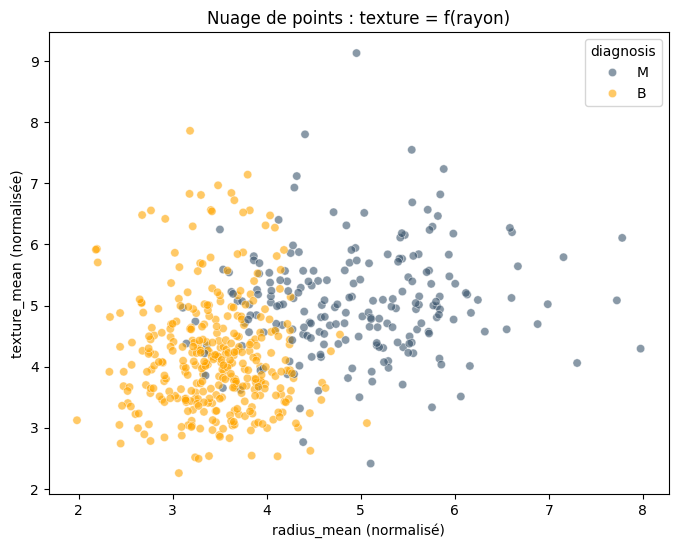

In [12]:
# --- Copie du DataFrame ---
df_plot = df.copy()

# --- Création des variables ---
df_plot["radius_norm"] = df["radius_mean"] / df["radius_mean"].std()
df_plot["texture_norm"] = df["texture_mean"] / df["texture_mean"].std()

# --- Scatterplot avec coloration par type de tumeur ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="radius_norm",
    y="texture_norm",
    hue="diagnosis",
    palette={"M": bleu, "B": "orange"}, 
    alpha=0.6
)

# --- Titres et axes ---
plt.title("Nuage de points : texture = f(rayon)")
plt.xlabel("radius_mean (normalisé)")
plt.ylabel("texture_mean (normalisée)")
plt.show()

**Observations :**

>Tout d'baord, le nuage ne semble pas présenté de Cluster. En effet, on ne remarque de groupes de données distincts (top gauche, top droite, etc...).\
>Au contraire, les points ont l’air assez bien répartis dans l’ensemble du graphique. Cette répartition assez homogène laisse penser qu’il existe un lien entre la texture et le rayon.\
>
>Cependant, même si l'on observe une légère tendance (les points ne sont pas complètement aléatoires), les deux types de tumeurs (M et B) restent partiellement mélangés.\
>Cela rend difficile une classification assez précise uniquement sur la base de ce nuage. On perçoit une structure, mais pas assez nette pour séparer les tumeurs malignes des bénignes de façon précise à l’œil nu.
>
>Mais si nous regardons que les points avec l'axe des ordonnée, je ne décele pas vraiement de lien. En effet, les il y a des tumeurs M et B à 3,5 et 6 sont mélangées.\
>Autrement dit, avec seulement la texture, je ne peux faire de classification correcte.
>
>Par contre, la rayon moyen semble être tout à fait pertinent. En effet, on distingue de petit cluster avec l'axe des abscisse. Entre 2 et 3,7 à peu près, on peut dire que la tumeur est Bégnine et entre 4.7 et 8 la tumeur et maligne.
>
>Cela montre à quelle point le rayon moyen est un indicateur performant dans notre analyse.

Pour se faire, **faisons parler les données avec les mathématiques !**

Calculons le coéfficient de corrélation de Monsieur Pearson et regardons s'il existe des un lien entre ces deux variables

In [13]:
# Coéfficient de Corrélation de Pearson
corr, p_value = pearsonr(df["radius_mean"], df["texture_mean"])

print(f"Le coéfficent de corrélation de Pearson est : {round(corr,3)} Soit environ : {round(corr*100,2)} %.")

# Pas obliger mais je voulais me faire plaisir...
def test_p_value(p_value):
    if p_value < 0.05 :
        print("\np_value inférieur à 0.05  --- Test Accépté ! ---")
    else :
        print("\np_value supérieur à 0.05  --- !! Test Réfusé !! ---")

test_p_value(p_value)            

Le coéfficent de corrélation de Pearson est : 0.324 Soit environ : 32.38 %.

p_value inférieur à 0.05  --- Test Accépté ! ---


**Observations :**

>- Le coefficient de corrélation de Pearson est de 0.324 $~ \Longrightarrow ~$ ce qui indique une liaison modérée entre la texture et le rayon.
>- La p-value est inférieure à 0.05, donc le test est significatif $~ \Longrightarrow ~$  on peut rejeter l’hypothèse d’indépendance.
>
>Autrement dit, même si le lien n’est pas très fort, il est statistiquement réel. Cela confirme ce qu’on avait observé sur le nuage de points : une tendance existe, mais elle n’est pas assez marquée pour bien séparer les cas M et B à elle seule.

## Question 7 : Exploiter l'approche graphique précédente pour confirmer ou infirmer le caractère discriminant des variables isolées à la question 5.

Avant de tracer tous les nuages de points possibles, j’ai essayé de réfléchir aux croisements qui pourraient vraiment apporter quelque chose. Certaines variables, même si elles sont discriminantes individuellement, donnent des informations assez proches les unes des autres. Par exemple, `radius_mean` et `perimeter_mean` ou encore `radius_mean` et `area_mean` sont probablement très corrélées géométriquement, donc les croiser n’apporterait peut-être pas grand-chose.

<p style="text-align:justify;">À l’inverse, j’ai l’impression que croiser deux variables qui mesurent des choses différentes pourrait être plus pertinent. Par exemple :

- **`radius_mean` et `concavity_mean`** : l’une parle de la taille de la tumeur, l’autre de la forme (irrégularités du contour). Le croisement des deux pourrait donner un nuage où les points M et B seraient mieux séparés.
- **`radius_mean` et `concave points_mean`** : un peu dans la même idée, on croise une mesure de dimension avec une mesure de forme.
- **`area_mean` et `compactness_mean`** : ce croisement pourrait aussi être intéressant, car on associe une mesure de surface à une mesure de compacité (forme).

<p style="text-align:justify;">Ce ne sont que des suppositions, mais je pense que ces combinaisons méritent d’être testées. L’objectif est de voir si, en les croisant, on observe visuellement une meilleure distinction entre les tumeurs malignes et bénignes. En revanche, j’éviterai de croiser des variables trop proches comme `radius_mean` et `perimeter_mean`, car elles risquent de produire un graphique avec une corrélation presque automatique, donc pas très utile pour la classification.



In [14]:
# Liste contenant seulement les varibles nécessaire
data = df[[
    "area_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "perimeter_mean"
]]

# --- Normalisation des données ---
for var in data:
    df_plot[var + "_norm"] = data[var] / data[var].std()

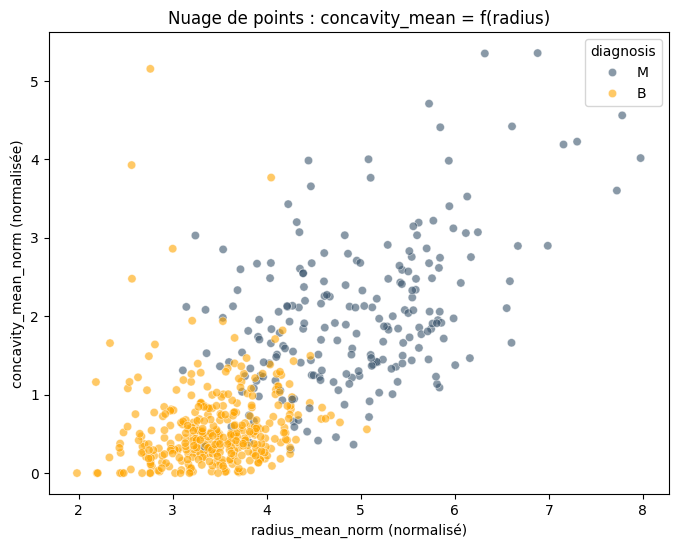

In [15]:
# --- Scatterplot avec coloration par type de tumeur ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="radius_norm",
    y="concavity_mean_norm",
    hue="diagnosis",
    palette={"M": bleu, "B": "orange"}, 
    alpha=0.6
)

# --- Titres et axes ---
plt.title("Nuage de points : concavity_mean = f(radius)")
plt.xlabel("radius_mean_norm (normalisé)")
plt.ylabel("concavity_mean_norm (normalisée)")
plt.show()

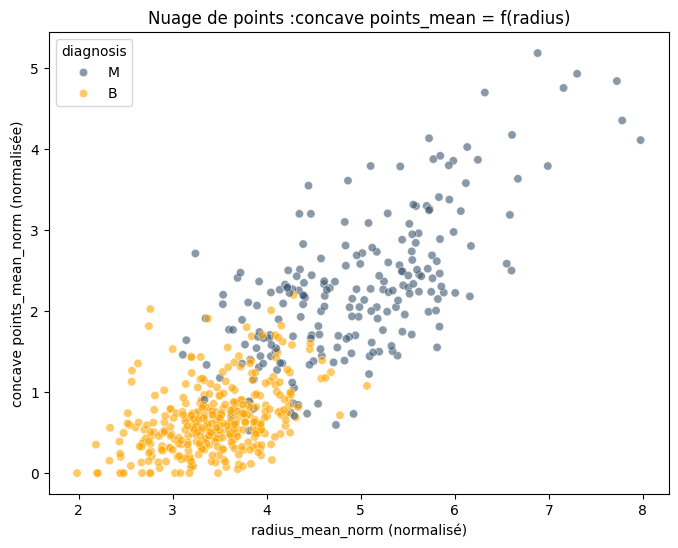

In [16]:
# --- Scatterplot avec coloration par type de tumeur ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="radius_norm",
    y="concave points_mean_norm",
    hue="diagnosis",
    palette={"M": bleu, "B": "orange"}, 
    alpha=0.6
)

# --- Titres et axes ---
plt.title("Nuage de points :concave points_mean = f(radius)")
plt.xlabel("radius_mean_norm (normalisé)")
plt.ylabel("concave points_mean_norm (normalisée)")
plt.show()

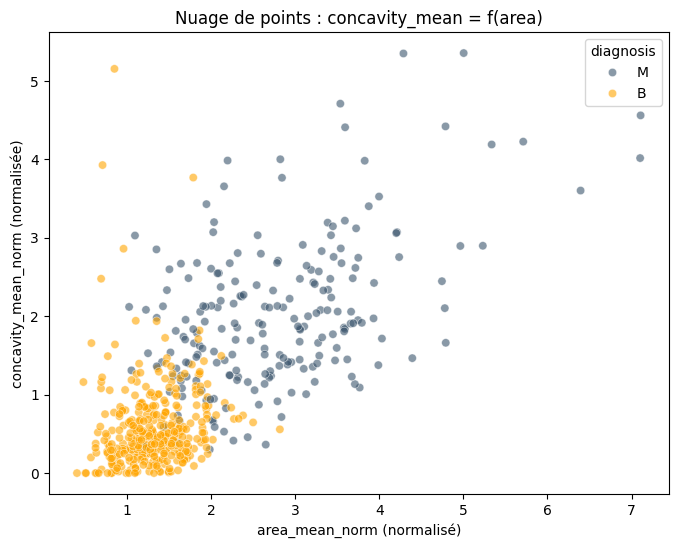

In [17]:
# --- Scatterplot avec coloration par type de tumeur ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="area_mean_norm",
    y="concavity_mean_norm",
    hue="diagnosis",
    palette={"M": bleu, "B": "orange"}, 
    alpha=0.6
)

# --- Titres et axes ---
plt.title("Nuage de points : concavity_mean = f(area)")
plt.xlabel("area_mean_norm (normalisé)")
plt.ylabel("concavity_mean_norm (normalisée)")
plt.show()

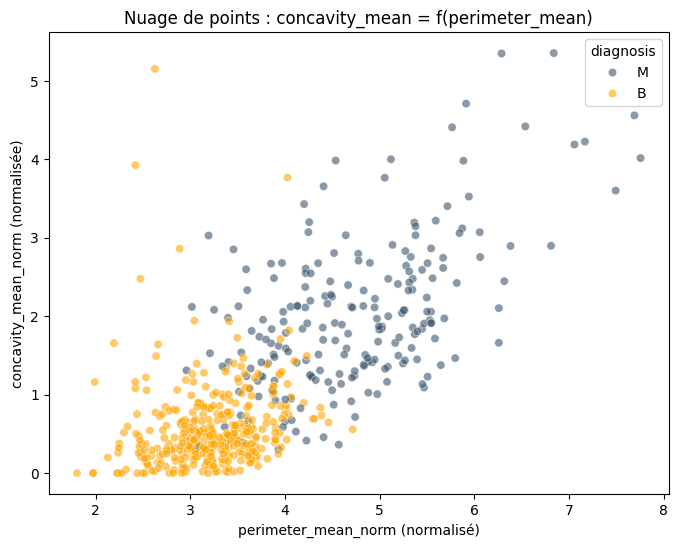

In [18]:
# --- Scatterplot avec coloration par type de tumeur ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="perimeter_mean_norm",
    y="concavity_mean_norm",
    hue="diagnosis",
    palette={"M": bleu, "B": "orange"}, 
    alpha=0.6
)

# --- Titres et axes ---
plt.title("Nuage de points : concavity_mean = f(perimeter_mean)")
plt.xlabel("perimeter_mean_norm (normalisé)")
plt.ylabel("concavity_mean_norm (normalisée)")
plt.show()

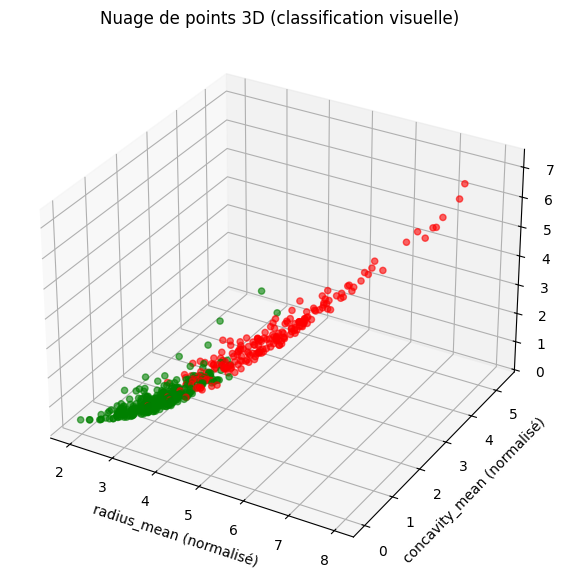

In [19]:
# Sélection et normalisation
df_3d = df[["radius_mean", "concavity_mean", "area_mean", "diagnosis"]].copy()
for col in ["radius_mean", "concavity_mean", "area_mean"]:
    df_3d[col] = df_3d[col] / df_3d[col].std()

# Création du graphique 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Couleurs selon M ou B
colors = df_3d["diagnosis"].map({"M": "red", "B": "green"})

# Scatter plot 3D
ax.scatter(
    df_3d["radius_mean"],
    df_3d["concavity_mean"],
    df_3d["area_mean"],
    c=colors,
    alpha=0.6
)

# Titres et axes
ax.set_xlabel("radius_mean (normalisé)")
ax.set_ylabel("concavity_mean (normalisé)")
ax.set_zlabel("area_mean (normalisé)")
ax.set_title("Nuage de points 3D (classification visuelle)")

plt.show()